<a href="https://colab.research.google.com/github/Derrick-Majani/Machine_Breakdown_CART/blob/main/DTMachine_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Data Description

The data contains the different attributes of machines and health. The detailed data dictionary is given below.

**Data Dictionary**

* UDI: Unique identifier ranging from 1 to 10000
* Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
* Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
* Process Temperature: Tool tip temperature measured in Kelvin
* Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
* Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
* Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
* Failure: 0-No failure, 1-Failure

## Import Data

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import io

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file from your local machine to Google Colab
uploaded = files.upload()



Saving Predictive_Maintenance_Case_Study.csv to Predictive_Maintenance_Case_Study (1).csv


In [ ]:
df = pd.read_csv("Predictive_Maintenance_Case_Study.csv")
df.sample(n=5)

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
1302,1303,L,298.6,328.185185,1505,45.7,144,0
1165,1166,L,297.1,321.888889,1487,34.6,208,0
7288,7289,M,300.2,331.148148,1983,20.8,83,0
2756,2757,L,299.7,325.962963,1781,29.6,201,0
363,364,L,297.6,322.629630,1438,47.8,84,0


In [ ]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [ ]:
data.shape

(10000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Check for missing values
df.isnull().sum()

UDI                    0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

## Statistical Summary

In [ ]:
# Print numerical summary
print('Numerical Summary:')
df.describe().T


Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.25,10000.0
Air temperature,10000.0,300.004930,2.000259,295.3,298.300000,300.100000,301.50,304.5
Process temperature,10000.0,328.946519,5.495312,313.0,324.481481,329.296296,333.00,343.0
Rotational speed,10000.0,1538.776100,179.284096,1168.0,1423.000000,1503.000000,1612.00,2886.0
Torque,10000.0,39.986910,9.968934,3.8,33.200000,40.100000,46.80,76.6
Tool wear,10000.0,107.951000,63.654147,0.0,53.000000,108.000000,162.00,253.0
Failure,10000.0,0.033900,0.180981,0.0,0.000000,0.000000,0.00,1.0


In [ ]:
# Print categorical summary
print('Categorical Summary:')
df.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
Type,10000,3,L,6000


In [ ]:
df = df.drop(["UDI"], axis=1)
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,M,298.1,323.740741,1551,42.8,0,0
1,L,298.2,324.111111,1408,46.3,3,0
2,L,298.1,323.370370,1498,49.4,5,0
3,L,298.2,323.740741,1433,39.5,7,0
4,L,298.2,324.111111,1408,40.0,9,0


In [ ]:
df['Failure'].value_counts()

0    9661
1     339
Name: Failure, dtype: int64

## Correlation Analysis

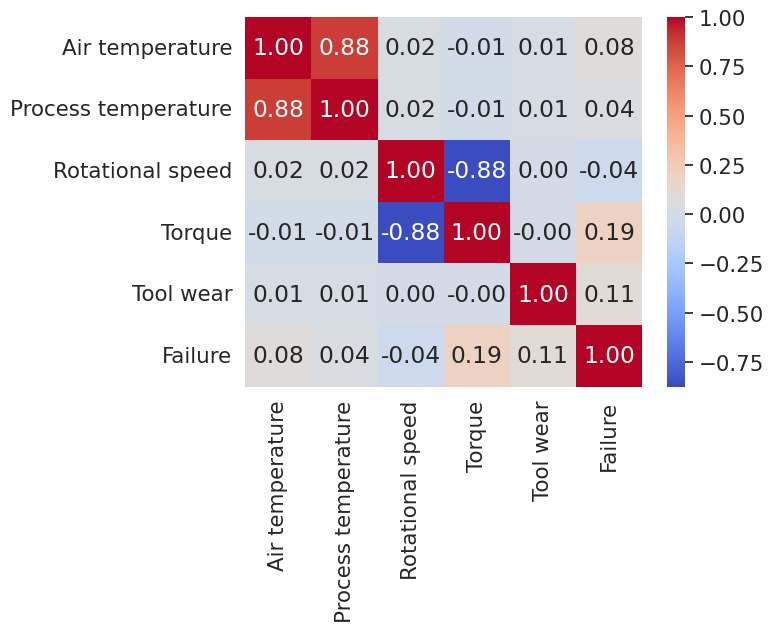

In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

## Scatter Plot or Multivariate Analysis

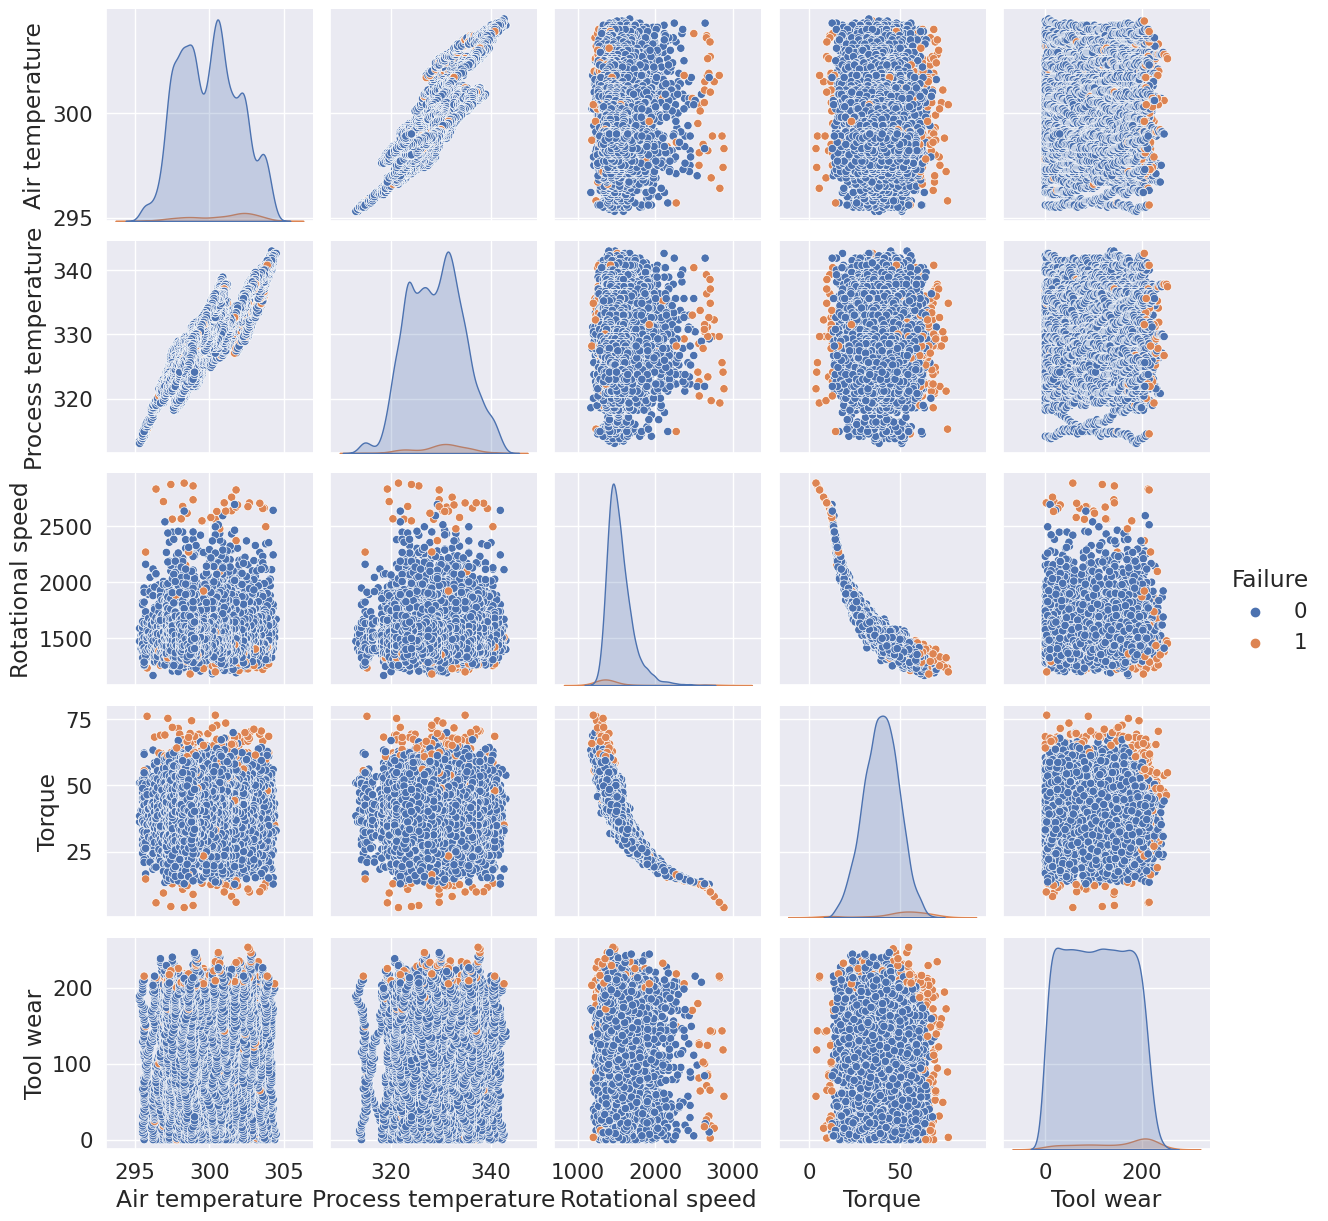

In [ ]:
sns.pairplot(df, hue="Failure")
plt.show()

## Data Preparation and Modelling

In [ ]:
# Define X and Y variables
X = df.drop(["Failure"], axis=1) # independent variables
y = df['Failure'] # dependent variable

### Get Dummies

In [ ]:
# iterate over the categorical columns and apply one-hot encoding
for col in X.select_dtypes(include=['object']):
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)

# print the encoded DataFrame
X.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_H,Type_L,Type_M
0,298.1,323.740741,1551,42.8,0,0,0,1
1,298.2,324.111111,1408,46.3,3,0,1,0
2,298.1,323.370370,1498,49.4,5,0,1,0
3,298.2,323.740741,1433,39.5,7,0,1,0
4,298.2,324.111111,1408,40.0,9,0,1,0


## Train and split the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (7000, 8)
Testing set shape: (3000, 8)


## Model Building

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

Training Accuracy: 1.0
Training Recall: 1.0
Training Precision: 1.0
Training F1 Score: 1.0
Testing Accuracy: 0.9803333333333333
Testing Recall: 0.7311827956989247
Testing Precision: 0.6666666666666666
Testing F1 Score: 0.6974358974358974


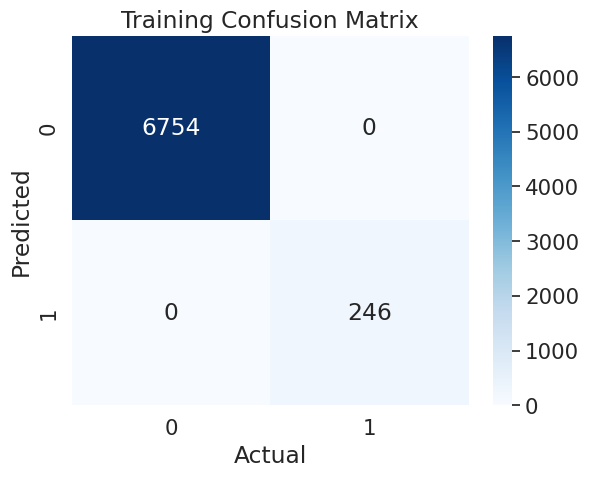

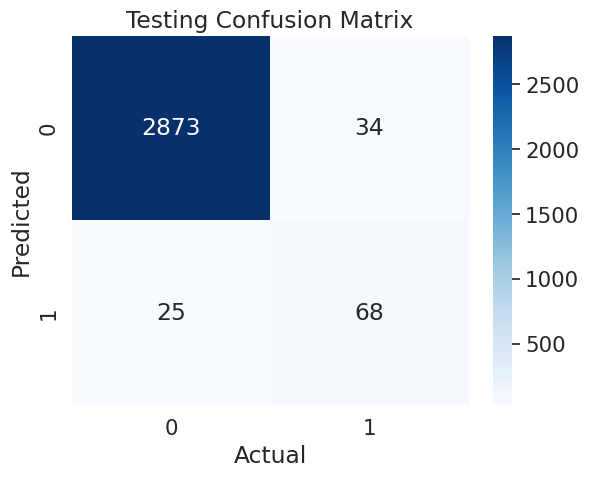

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Initialize the classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
dtc.fit(X_train, y_train)

# Predict the classes of the training and testing data
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Calculate the performance metrics for training and testing data
dtc_train_accuracy = accuracy_score(y_train, y_train_pred)
dtc_train_recall = recall_score(y_train, y_train_pred)
dtc_train_precision = precision_score(y_train, y_train_pred)
dtc_train_f1_score = f1_score(y_train, y_train_pred)

dtc_test_accuracy = accuracy_score(y_test, y_test_pred)
dtc_test_recall = recall_score(y_test, y_test_pred)
dtc_test_precision = precision_score(y_test, y_test_pred)
dtc_test_f1_score = f1_score(y_test, y_test_pred)

print("Training Accuracy:", dtc_train_accuracy)
print("Training Recall:", dtc_train_recall)
print("Training Precision:", dtc_train_precision)
print("Training F1 Score:", dtc_train_f1_score)

print("Testing Accuracy:", dtc_test_accuracy)
print("Testing Recall:", dtc_test_recall)
print("Testing Precision:", dtc_test_precision)
print("Testing F1 Score:", dtc_test_f1_score)

# Plot the confusion matrix for training and testing data
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

sns.set(font_scale=1.4)
sns.heatmap(train_cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

sns.heatmap(test_cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Testing Confusion Matrix')
plt.show()


- The model is performing well on the training data but overfitting on testing data

### Decision Tree (Pre-pruning)

## Grid Search Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
hyperparameters = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(clf, hyperparameters, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.4474285714285714


Training Accuracy: 0.9815714285714285
Training Recall: 0.5894308943089431
Training Precision: 0.838150289017341
Training F1 Score: 0.6921241050119332
Testing Accuracy: 0.968
Testing Recall: 0.3333333333333333
Testing Precision: 0.47692307692307695
Testing F1 Score: 0.3924050632911392


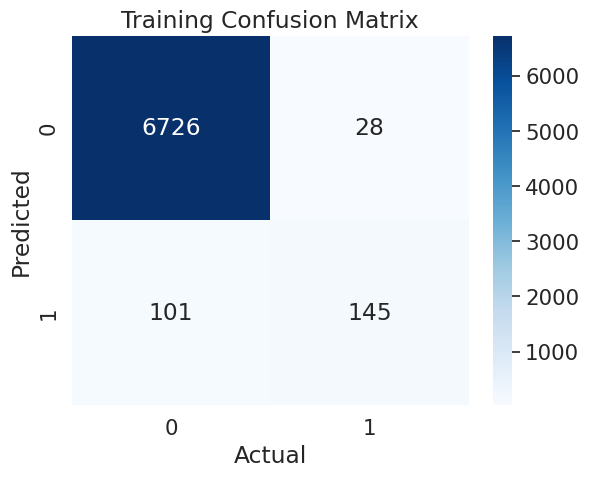

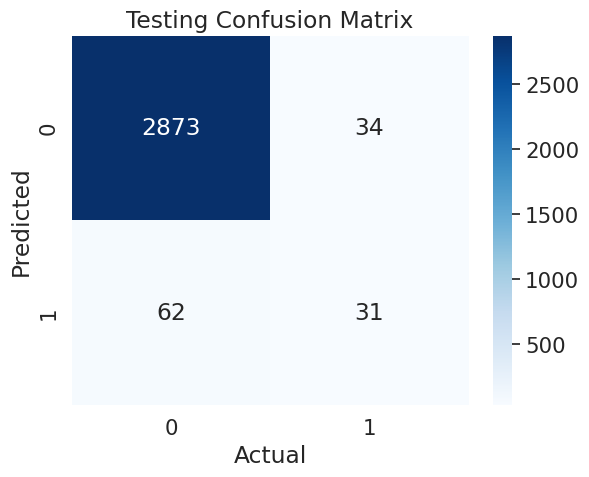

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Initialize the classifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=7, max_features='log2',min_samples_leaf=1, min_samples_split= 10,random_state=42)

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Predict the classes of the training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate the performance metrics for training and testing data
dt_train_accuracy = accuracy_score(y_train, y_train_pred)
dt_train_recall = recall_score(y_train, y_train_pred)
dt_train_precision = precision_score(y_train, y_train_pred)
dt_train_f1_score = f1_score(y_train, y_train_pred)

dt_test_accuracy = accuracy_score(y_test, y_test_pred)
dt_test_recall = recall_score(y_test, y_test_pred)
dt_test_precision = precision_score(y_test, y_test_pred)
dt_test_f1_score = f1_score(y_test, y_test_pred)

print("Training Accuracy:", dt_train_accuracy)
print("Training Recall:", dt_train_recall)
print("Training Precision:", dt_train_precision)
print("Training F1 Score:", dt_train_f1_score)

print("Testing Accuracy:", dt_test_accuracy)
print("Testing Recall:", dt_test_recall)
print("Testing Precision:", dt_test_precision)
print("Testing F1 Score:", dt_test_f1_score)

# Plot the confusion matrix for training and testing data
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

sns.set(font_scale=1.4)
sns.heatmap(train_cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

sns.heatmap(test_cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Testing Confusion Matrix')
plt.show()


## Visualize the Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

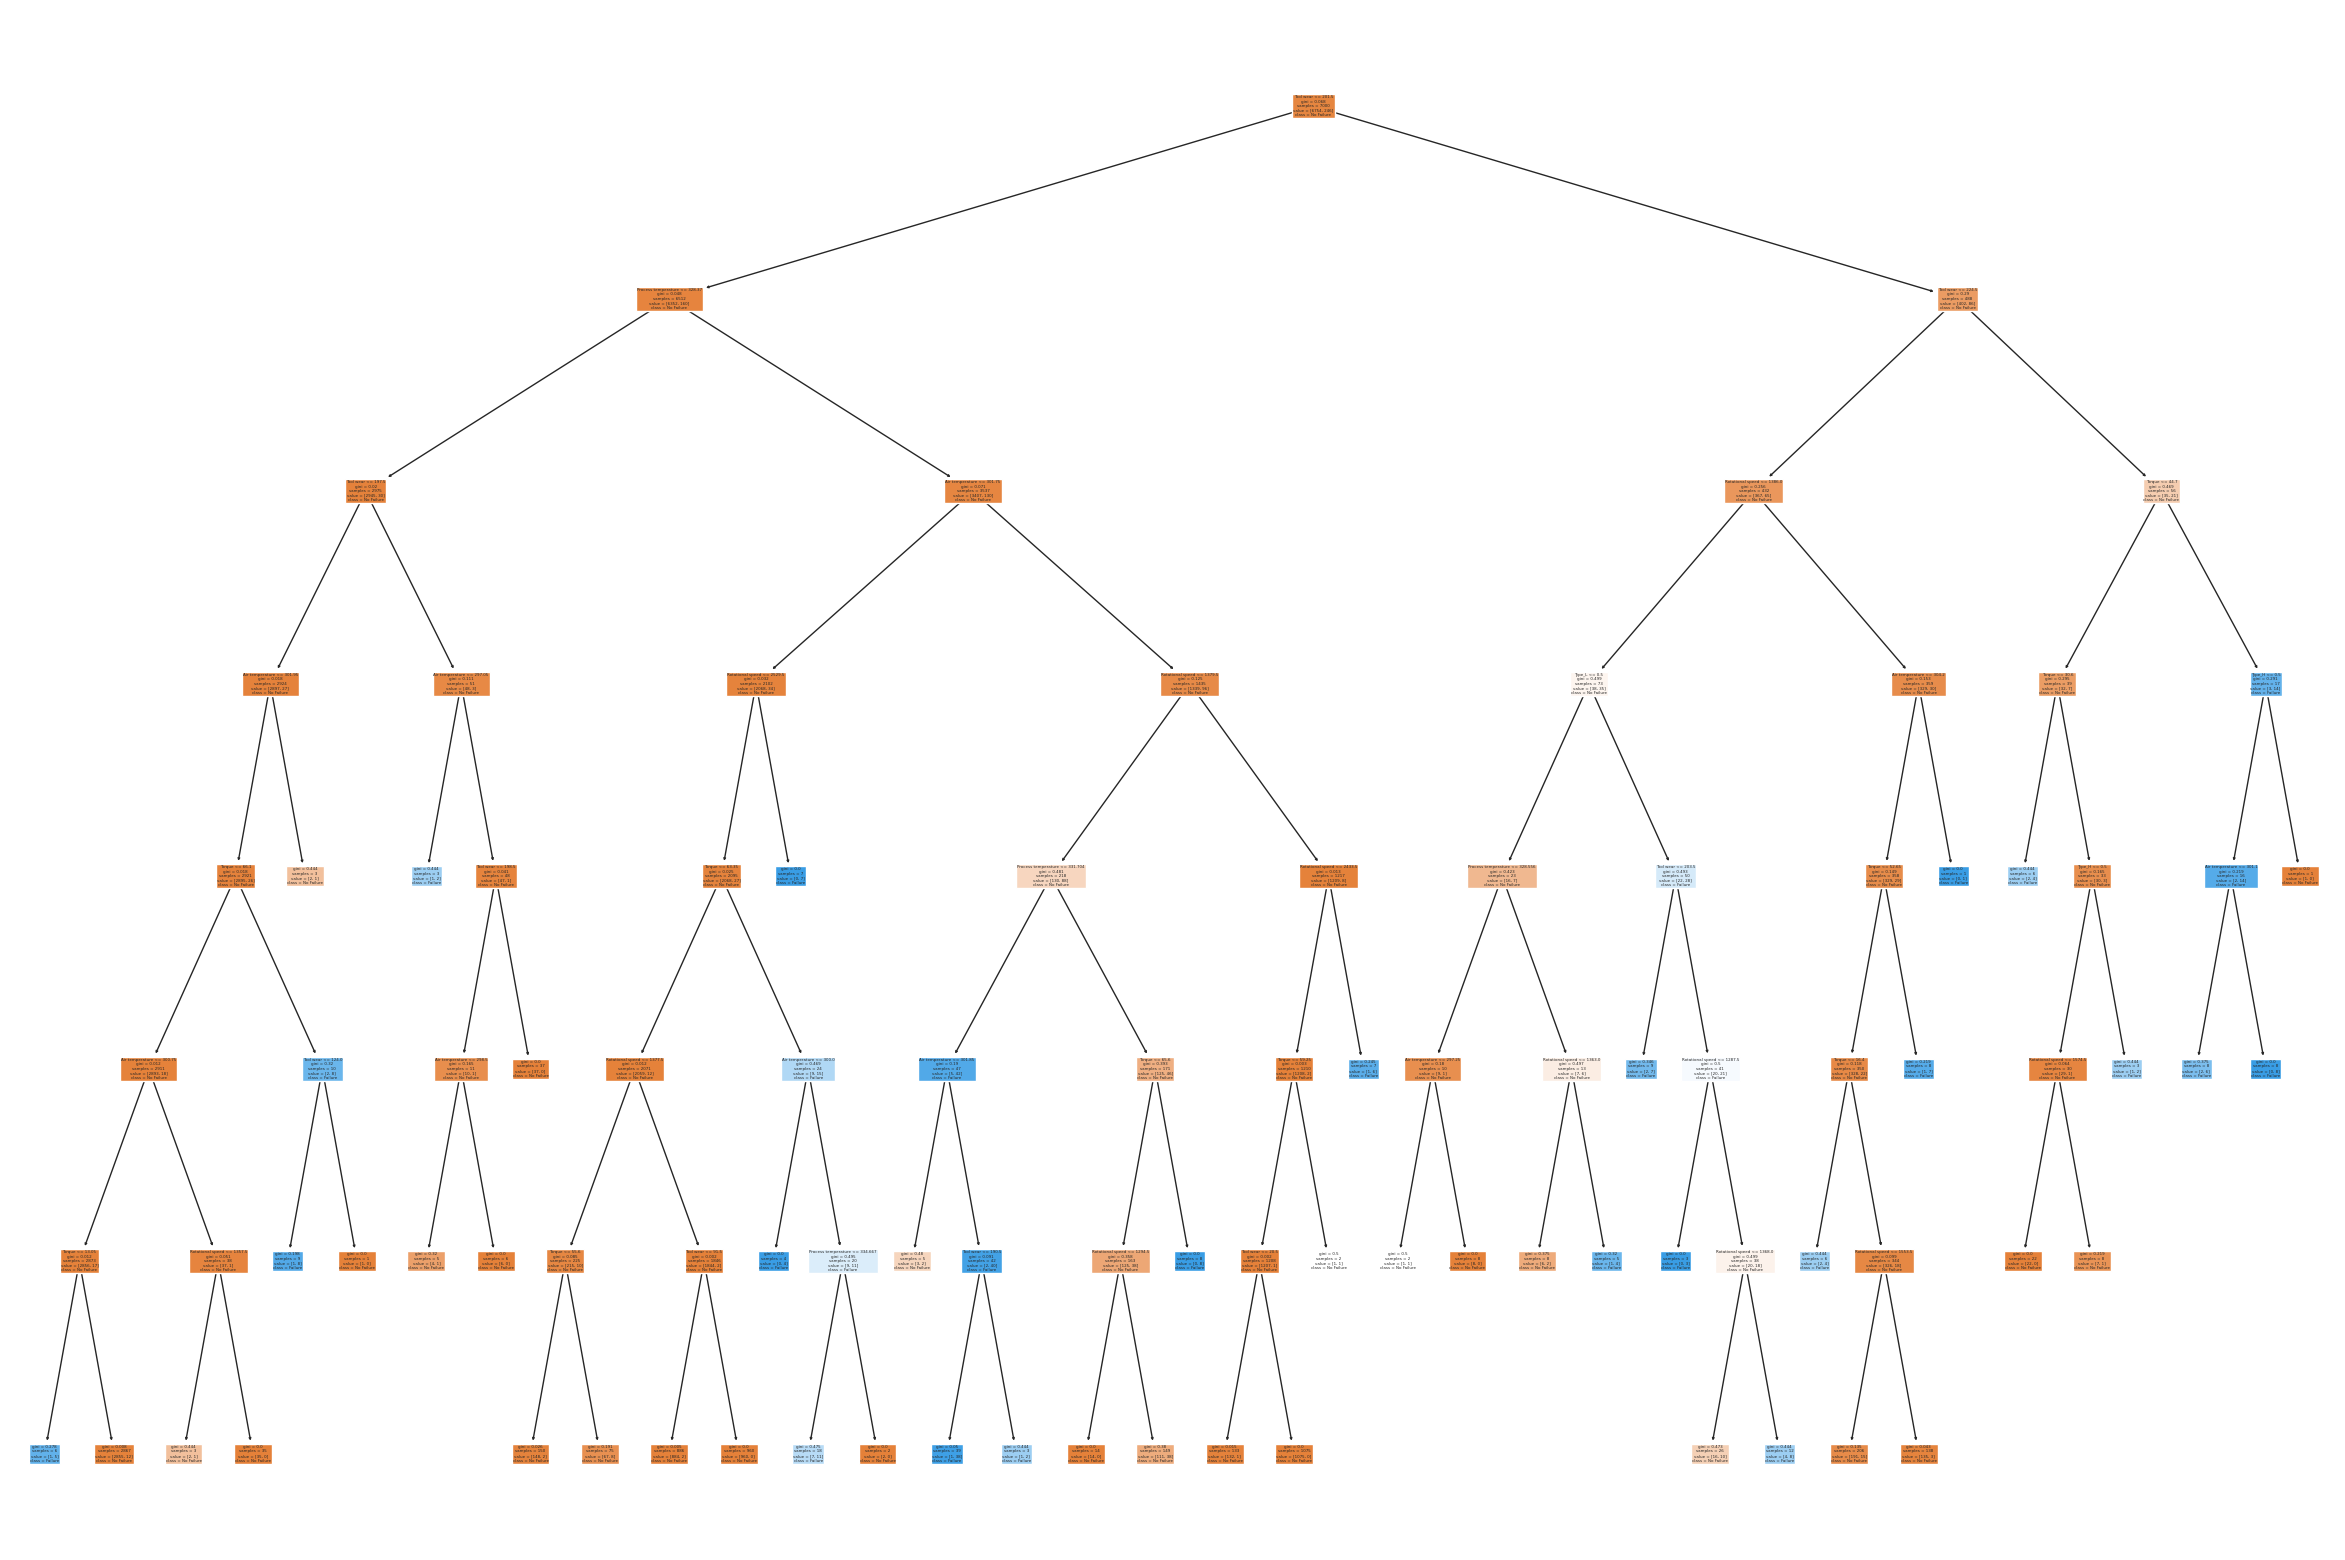

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(30,20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Failure', 'Failure'])
plt.show()

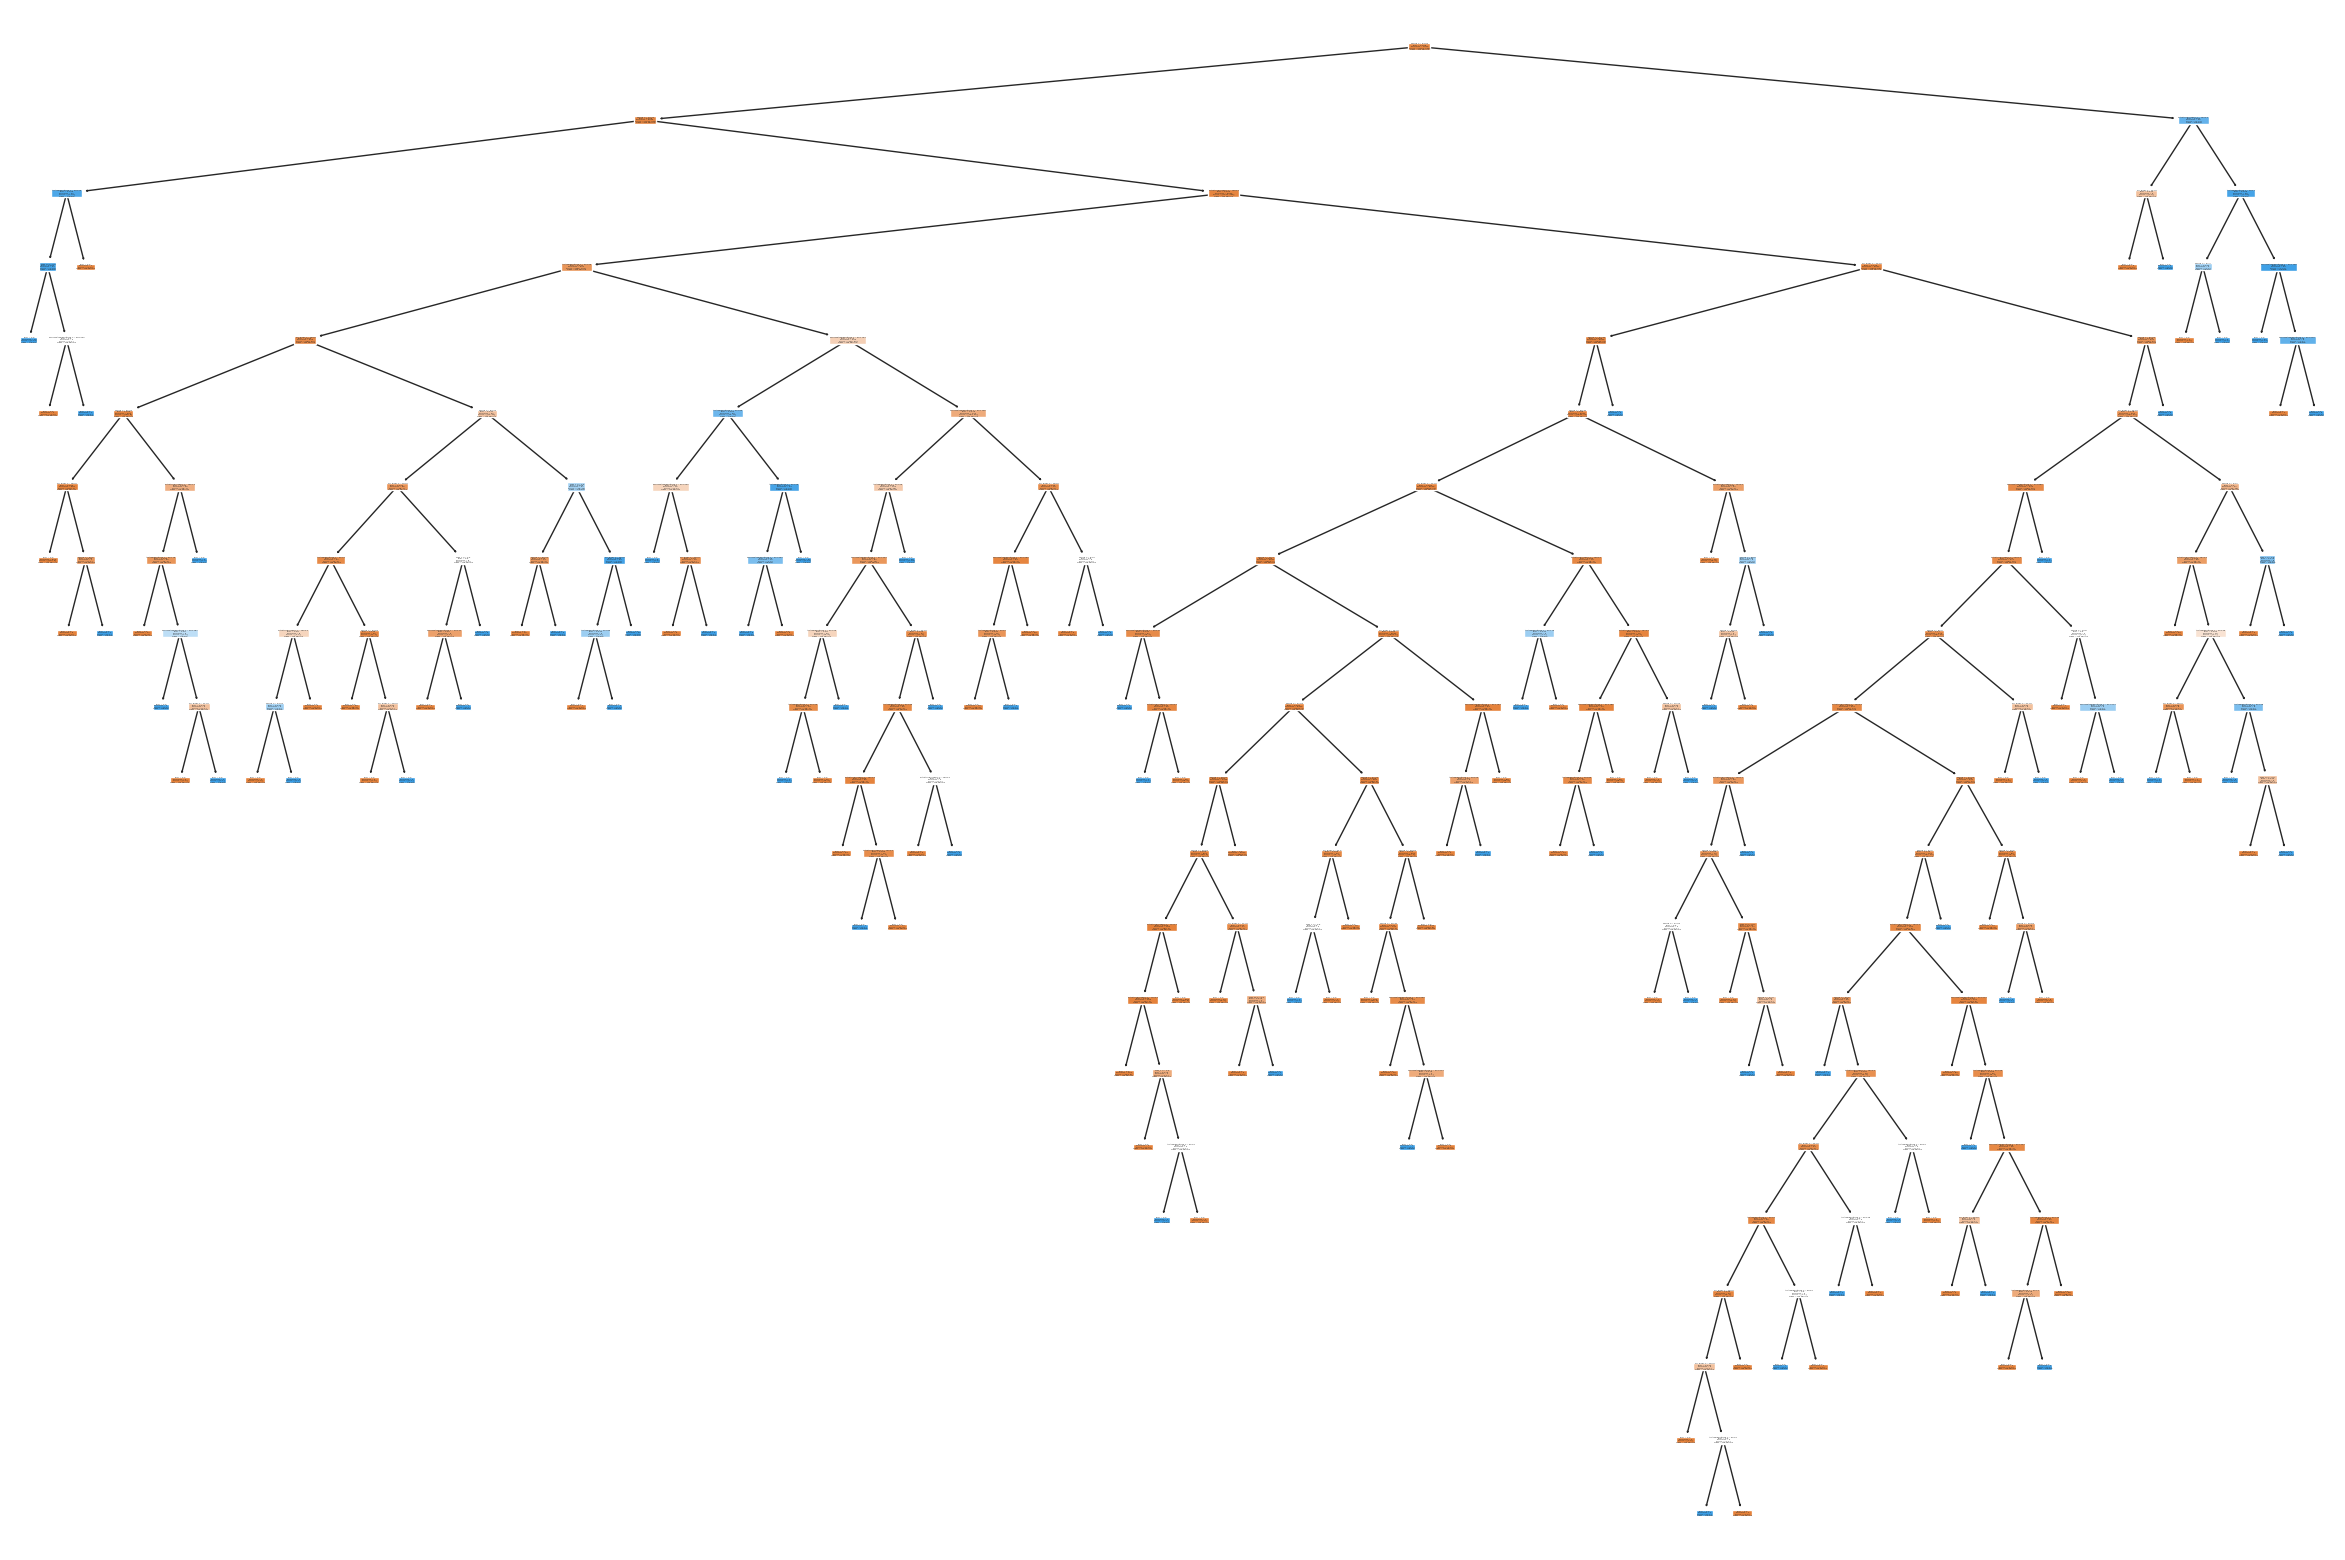

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(30,20))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['No Failure', 'Failure'])
plt.show()

In [ ]:
from sklearn import tree

In [ ]:
feature_names = list(X_train.columns)
importances = dtc.feature_importances_
indices = np.argsort(importances)

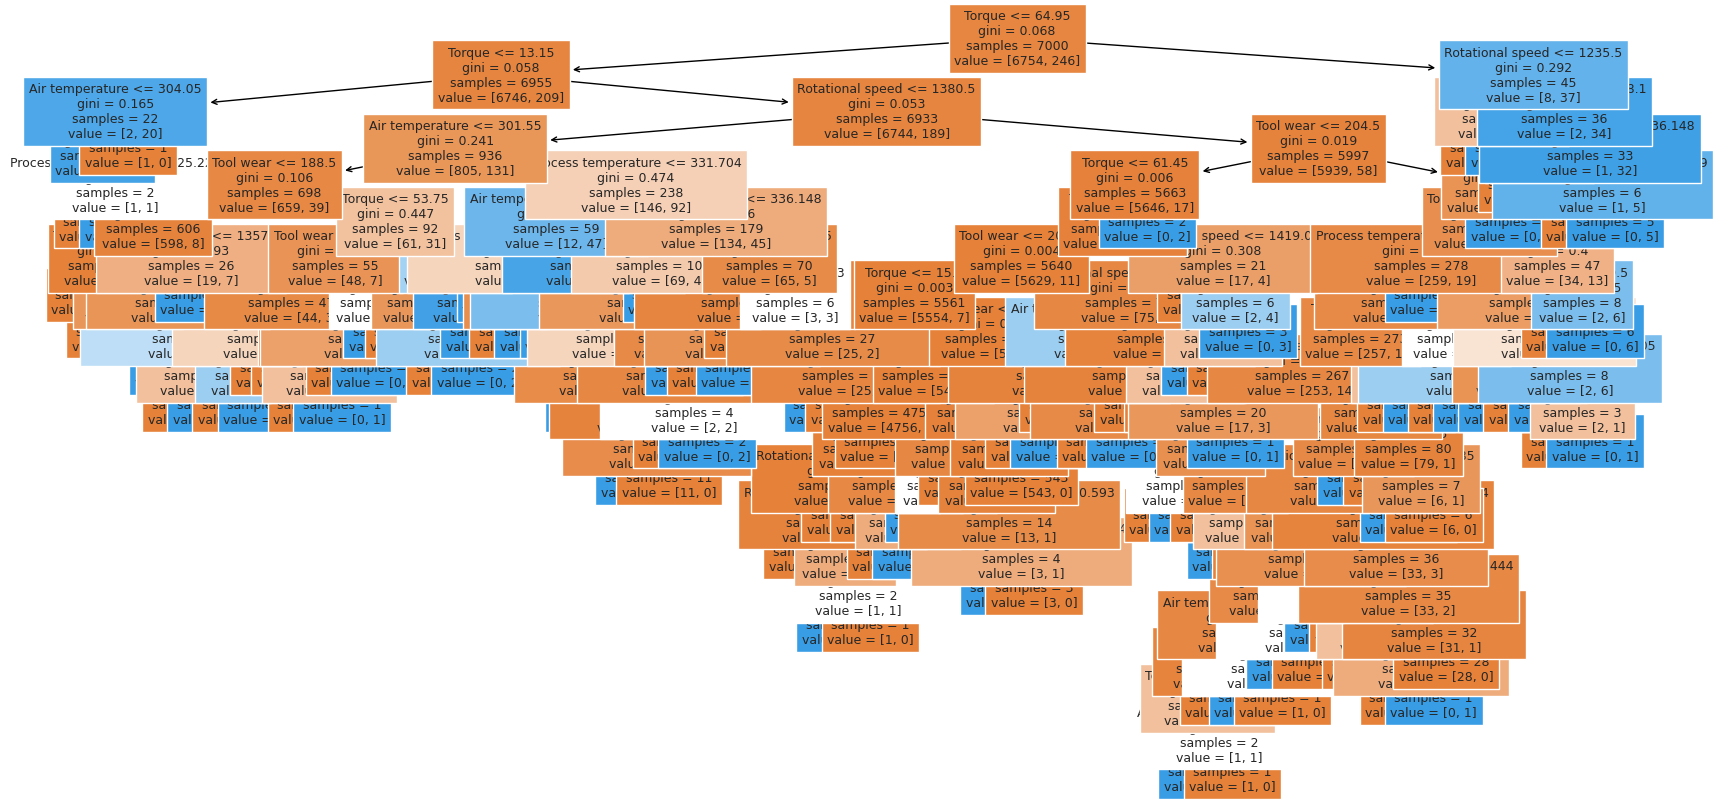

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtc,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
feature_names = list(X_train.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

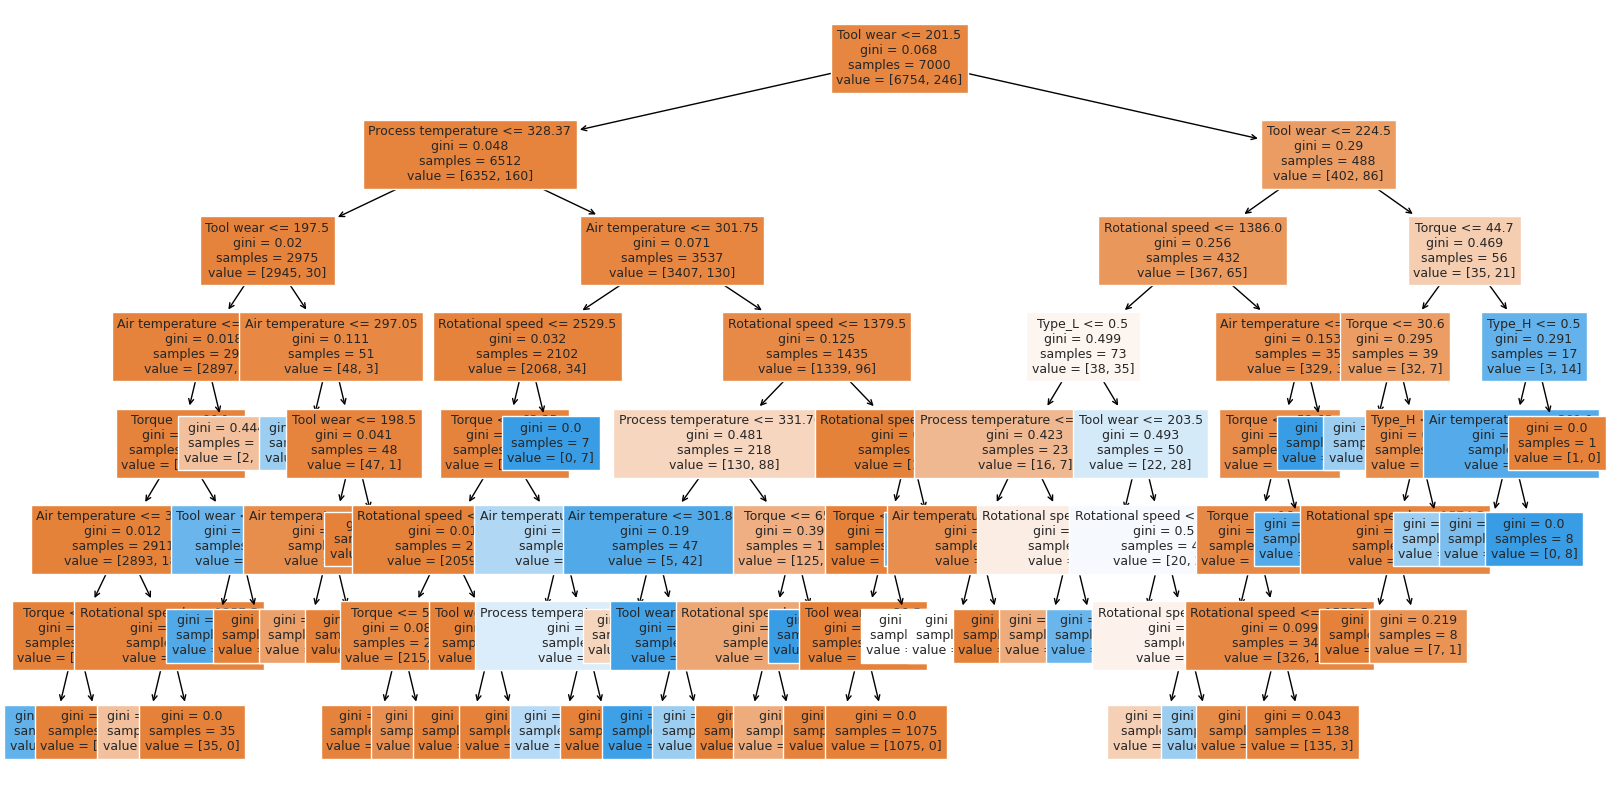

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


### Plot Feaature Importance

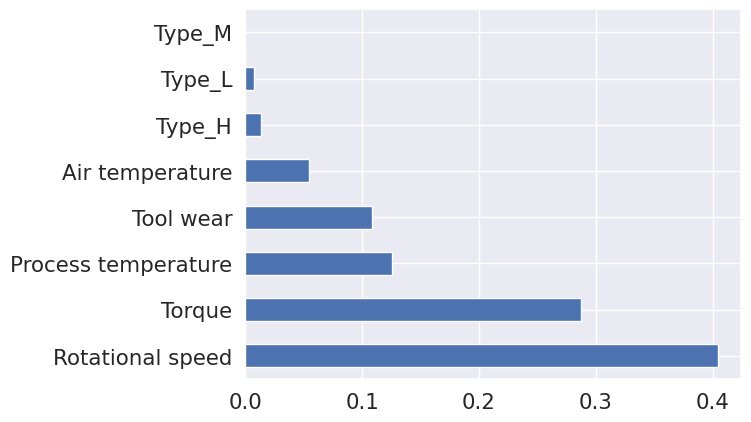

In [ ]:
# Plot feature importance
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

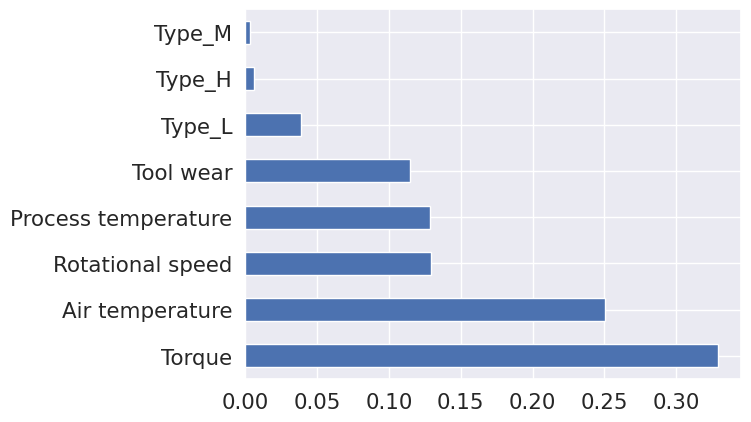

In [ ]:
# Plot feature importance
feat_importances = pd.Series(dtc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Post Prunning

Optimal ccp_alpha: 0.0
Training set performance:
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
F1 score: 1.000

Testing set performance:
Accuracy: 0.980
Recall: 0.731
Precision: 0.667
F1 score: 0.697


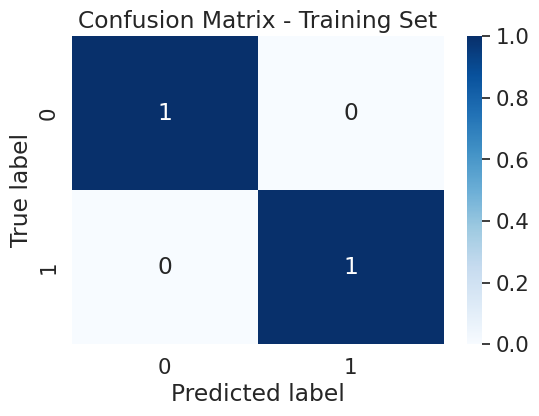

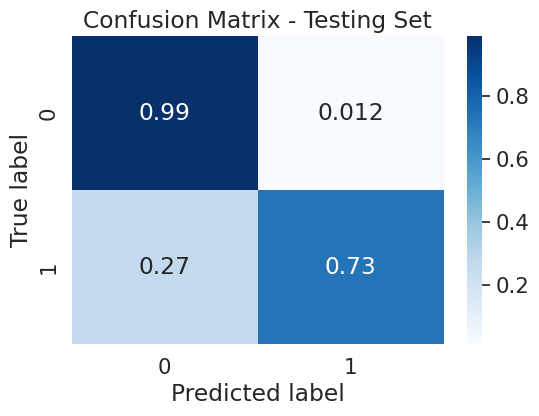

In [ ]:
# Perform post-pruning on the decision tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # remove the maximum alpha

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Determine the optimal value of ccp_alpha that maximizes recall on the testing set
max_recall = 0
optimal_ccp_alpha = 0
for i in range(len(ccp_alphas)):
    y_test_pred = clfs[i].predict(X_test)
    recall = recall_score(y_test, y_test_pred)
    if recall > max_recall:
        max_recall = recall
        optimal_ccp_alpha = ccp_alphas[i]

print("Optimal ccp_alpha:", optimal_ccp_alpha)

# Train the decision tree classifier on the training set with the optimal ccp_alpha
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the training set with the optimal ccp_alpha
y_train_pred = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
print("Training set performance:")
print("Accuracy: {:.3f}".format(accuracy_train))
print("Recall: {:.3f}".format(recall_train))
print("Precision: {:.3f}".format(precision_train))
print("F1 score: {:.3f}".format(f1_train))

# Evaluate the performance of the decision tree classifier on the testing set with the optimal ccp_alpha
y_test_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
print("\nTesting set performance:")
print("Accuracy: {:.3f}".format(accuracy_test))
print("Recall: {:.3f}".format(recall_test))
print("Precision: {:.3f}".format(precision_test))
print("F1 score: {:.3f}".format(f1_test))

# Plot the confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train_percent = cm_train / cm_train.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_percent, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Plot the confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test_percent = cm_test / cm_test.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_percent, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Testing Set')
plt.show()


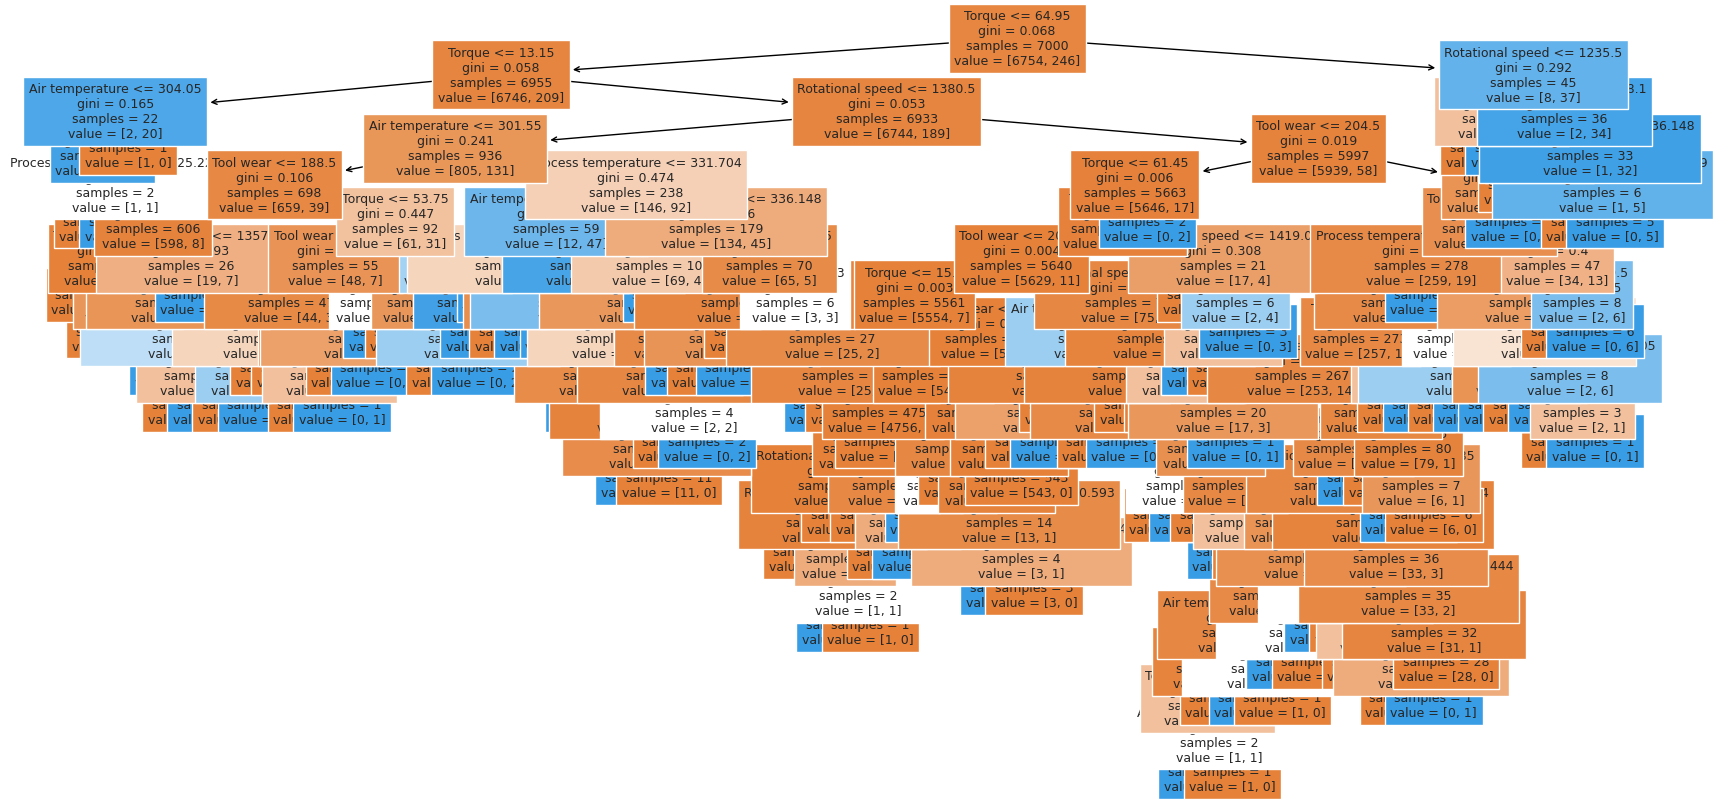

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    clf,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

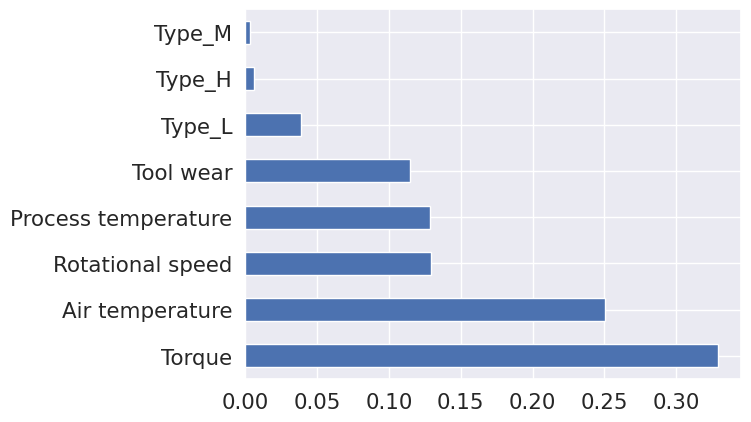

In [ ]:
# Plot feature importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## COmparison and final Selection

In [ ]:
import pandas as pd

# Create a list of dictionaries with the performance metrics for each model
models = [{'Model': 'Decision Tree Default',
           'Accuracy (Train)': dtc_train_accuracy,
           'Accuracy (Test)': dtc_test_accuracy,
           'Recall (Train)': dtc_train_recall,
           'Recall (Test)': dtc_test_recall,
           'Precision (Train)': dtc_train_precision,
           'Precision (Test)': dtc_test_precision,
           'F1 Score (Train)': dtc_train_f1_score,
           'F1 Score (Test)': dtc_test_f1_score},
          
          {'Model': 'Pre-Pruned Decision Tree',
           'Accuracy (Train)': dt_train_accuracy,
           'Accuracy (Test)': dt_test_accuracy,
           'Recall (Train)': dt_train_recall,
           'Recall (Test)': dt_test_recall,
           'Precision (Train)': dt_train_precision,
           'Precision (Test)': dt_test_precision,
           'F1 Score (Train)': dt_train_f1_score,
           'F1 Score (Test)': dt_test_f1_score},
          
          {'Model': 'Post-Pruned Decision Tree',
           'Accuracy (Train)': accuracy_train,
           'Accuracy (Test)': accuracy_test,
           'Recall (Train)': recall_train,
           'Recall (Test)': recall_test,
           'Precision (Train)': precision_train,
           'Precision (Test)': precision_test,
           'F1 Score (Train)': f1_train,
           'F1 Score (Test)': f1_test}]

# Create a dataframe from the list of dictionaries
df_summary = pd.DataFrame(models)

# Set the Model column as the index of the dataframe
df_summary.set_index('Model', inplace=True)

# Print the summary dataframe
df_summary


,Accuracy (Train),Accuracy (Test),Recall (Train),Recall (Test),Precision (Train),Precision (Test),F1 Score (Train),F1 Score (Test)
Model,,,,,,,,
Decision Tree Default,1.000000,0.980333,1.000000,0.731183,1.00000,0.666667,1.000000,0.697436
Pre-Pruned Decision Tree,0.981571,0.968000,0.589431,0.333333,0.83815,0.476923,0.692124,0.392405
Post-Pruned Decision Tree,1.000000,0.980333,1.000000,0.731183,1.00000,0.666667,1.000000,0.697436
